## Discrete Fourier Transform

Q1. Compute the 8-point DFT of the following sequences. Plot the magnitude and phase spectrum. Observe the symmetry properties.
<ol>
  <li>x[n] = {1,1,0,0,0,0,0,1}</li>
  <li>x[n] = {0,1,1,0,0,0,-1,-1}</li>
  <li>x[n] = {1,1,1,1,1,1,1,1}</li>
</ol>

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.fft.fft.html#numpy.fft.fft

In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def DFT_plot(a,n, ret = False):
    k = range(n)
    #a = np.array([1,1,0,0,0,0,0,1])
    A = np.fft.fft(a,n)

    #print(A)
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    plt.stem(k,abs(A))
    plt.title("Magnitude plot")
    
    angles = np.angle(A)
    plt.subplot(122)
    plt.stem(k, angles, 'g')
    plt.title("Phase plot")
    plt.show()
    
    if ret:
        return A


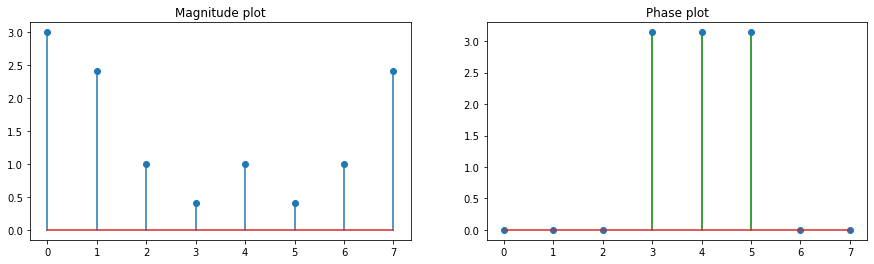

In [3]:
# part 1  : x[n] = {1,1,0,0,0,0,0,1}
x1 = np.array([1,1,0,0,0,0,0,1])
DFT_plot(x1,n=8)


**Observations -**
1. X[0] = sum of n=0 to N x[n]
2. magnitude and phase plots are symmetric about n=4.
3. X[k] = X*[N-k]
4. Magnitude spectrum is even, Phase spectrum is odd.

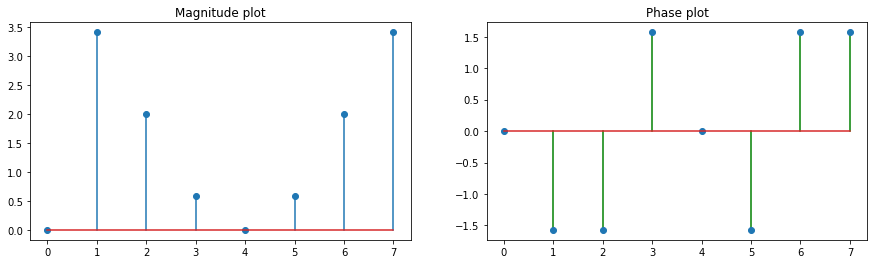

In [4]:
# Part 2: x[n]= {0,1,1,0,0,0,-1,-1}
x2 = np.asarray([0,1,1,0,0,0,-1,-1])
DFT_plot(x2,n=8)

**Observations -**
1. X[0] = sum of n=0 to N x[n]
2. magnitude and phase plots are symmetric about n=4.
3. X[k] = X*[N-k]
4. Magnitude spectrum is even, Phase spectrum is odd

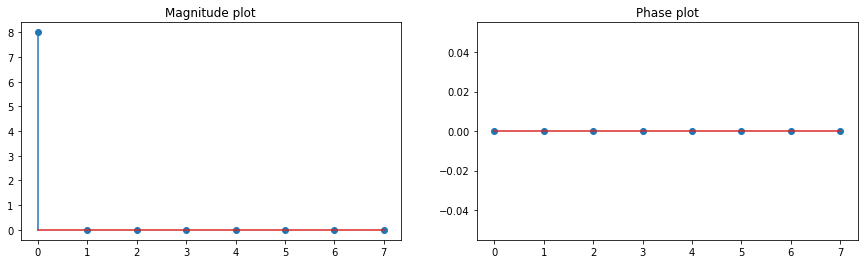

In [5]:
# part 3: x[n] = {1,1,1,1,1,1,1,1}
x3 = np.asarray([1,1,1,1,1,1,1,1])
DFT_plot(x3, n=8)

**Observations -**
1. X[0] = sum of n=0 to N x[n]
2. magnitude and phase plots are symmetric about n=4.
3. X[k] = X*[N-k]
4. Magnitude spectrum is even, Phase spectrum is odd
---

Q2. Generate the finite duration sequence $x[n] = 0.5(1-cos({\pi}n/20)), ~~0{\le}n{\lt}20$.
<ol>
  <li>Append the sequence with sufficient number of zeros to compute the DFT of the sequence with length N= 32 and 256. Plot the DFT and comment on the effects of zero padding</li>
  <li>Insert 16 zeros in the beginning of the sequence and repeat.</li>
</ol>


**Part 1-**

In [6]:
n = np.arange(20)
x_2 = 0.5*(1-np.cos(n*np.pi/20))
x_2

array([0.        , 0.00615583, 0.02447174, 0.05449674, 0.0954915 ,
       0.14644661, 0.20610737, 0.27300475, 0.3454915 , 0.42178277,
       0.5       , 0.57821723, 0.6545085 , 0.72699525, 0.79389263,
       0.85355339, 0.9045085 , 0.94550326, 0.97552826, 0.99384417])

In [7]:
x2_32 = np.concatenate((x_2,np.zeros(12)))
x2_32

array([0.        , 0.00615583, 0.02447174, 0.05449674, 0.0954915 ,
       0.14644661, 0.20610737, 0.27300475, 0.3454915 , 0.42178277,
       0.5       , 0.57821723, 0.6545085 , 0.72699525, 0.79389263,
       0.85355339, 0.9045085 , 0.94550326, 0.97552826, 0.99384417,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

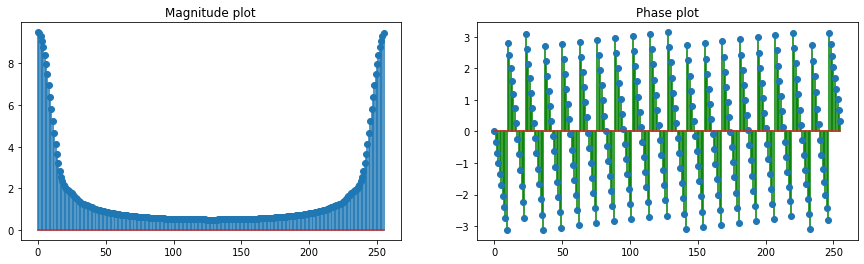

In [8]:
r = DFT_plot(x_2, n = 256, ret=True)

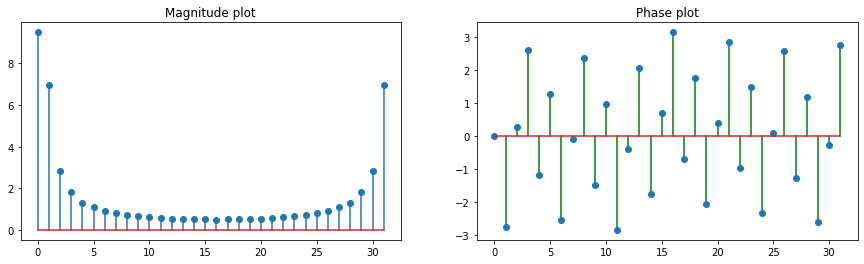

In [13]:
DFT_plot(x2_32, n=32)

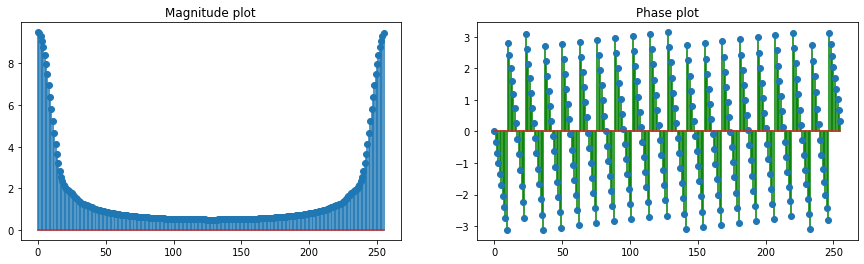

In [23]:
x2_256 = np.concatenate((x_2,np.zeros(236)))
DFT_plot(x2_256, n=256)
#r==r2

In [ ]:
# No effect of zero padding.

**Observation-:
1. As n increases we are able to capture more spectral details.
2. No effect of padding.**

**Part2 -**

In [9]:
x2_32b = np.concatenate((np.zeros(16),x_2))
x2_32b

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00615583, 0.02447174, 0.05449674,
       0.0954915 , 0.14644661, 0.20610737, 0.27300475, 0.3454915 ,
       0.42178277, 0.5       , 0.57821723, 0.6545085 , 0.72699525,
       0.79389263, 0.85355339, 0.9045085 , 0.94550326, 0.97552826,
       0.99384417])

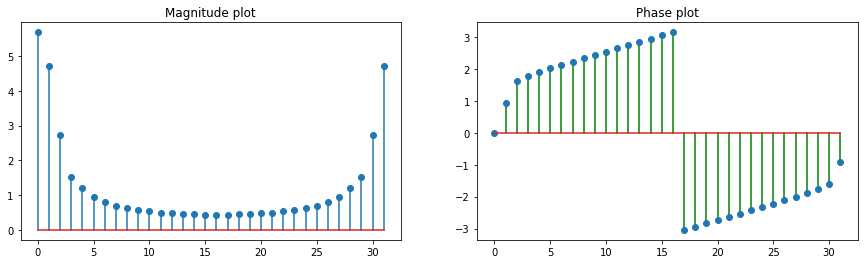

In [11]:
DFT_plot(x2_32b, n=32)

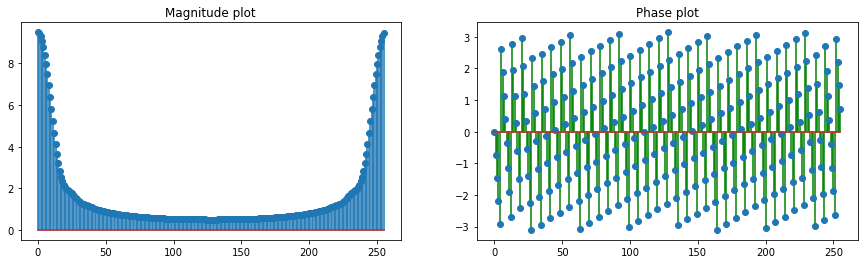

In [12]:
DFT_plot(x2_32b, n=256)

**Effect of zero padding in beginning of a signal is -
  that magnitude remains same whereas phase changes**

In [25]:
#r1 = DFT_plot([1,2,3,4], n=8, ret = True)
#r2 = DFT_plot([0,0,0,0,1,2,3,4], n=8, ret = True)
#r1==r2

**Observation-**
1.

Q3. Plot the 32 point DFT of the following signals and comment on the spectral estimate.
<ol>
  <li>$x[n] = cos(3{\pi}n/8)$</li>
  <li>$x[n] = cos(3{\pi}n/16)$</li>
  <li>$x[n] = cos(3{\pi}n/17)$</li>
</ol>

In [13]:
n = np.arange(32)
x31 = np.cos(3*np.pi*n/8)
x32 = np.cos(3*np.pi*n/16)
x33 = np.cos(3*np.pi*n/17)

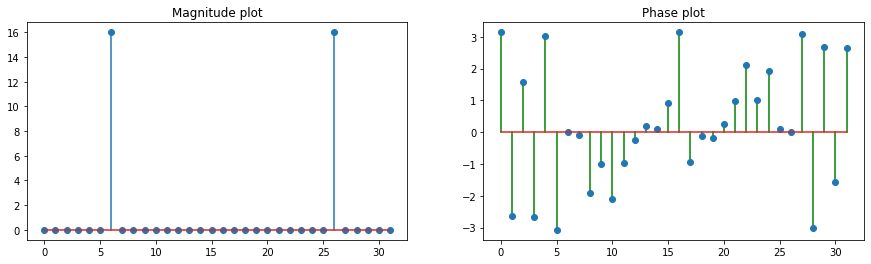

In [14]:
DFT_plot(x31,n=32)

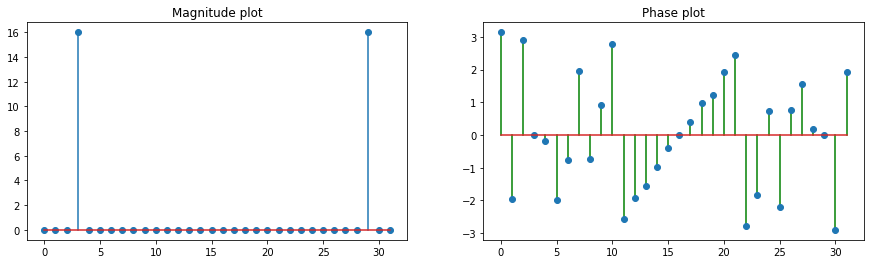

In [15]:
DFT_plot(x32, n=32)

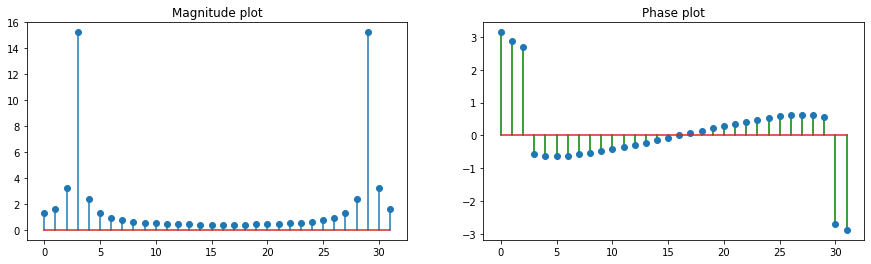

In [16]:
x_ret_32 = DFT_plot(x33, n=32, ret = True)

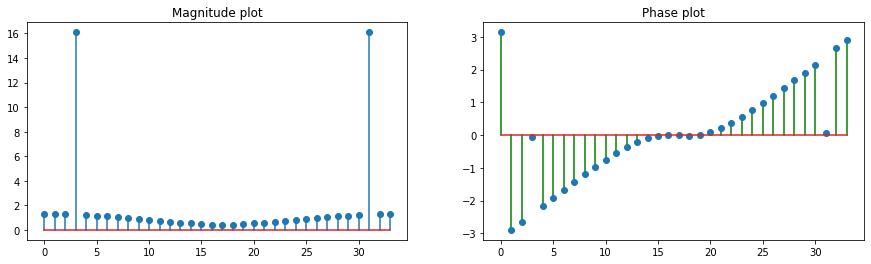

In [14]:
#x_ret_34 = DFT_plot(x33, n=34, ret = True)

**Observations - 
  1. 1st signal is periodic with n = 16, second is with n = 32 and third one is periodic with n=34.
  2. As n in n-pt. DFT increases, more spectral details can be observed.**

In [12]:
#DFT_plot(x33, n=34)

In [11]:
#DFT_plot(x33, n=64)

Q4. Estimation of signal corrupted by noise: Generate the signal $s[n] = cos({\pi}5n/32) +cos({\pi}21n/64) $ for 256 samples. Generate a noisy version of the signal x[n]  by adding white gaussian noise e[n] with variance 0.3 to the original signal s[n]. Compute the energy in the error signal $\sum_{n}^{}(x[n] - s[n])^2$ 
<ul>
  <li>Plot the 256 point DFTs $S[k]$ and $X[k]$. Find the set $S_{nz}$ of the values of $k$ for which $S[k]$ is non-zero.</li>
  <li>Find $\hat{X}[k] = X[k]$ if  $k~ \in \mathcal ~{S_{nz}}$ and zero otherwise. Find the IDFT $\hat{x}[n]$ from $\hat{X}[k]$ to recover the original signal. Plot $\hat{x}[n]$. Find the error signal energy after recovery $\sum_{n}^{}(\hat{x}[n] - s[n])^2$</li>
</ul>

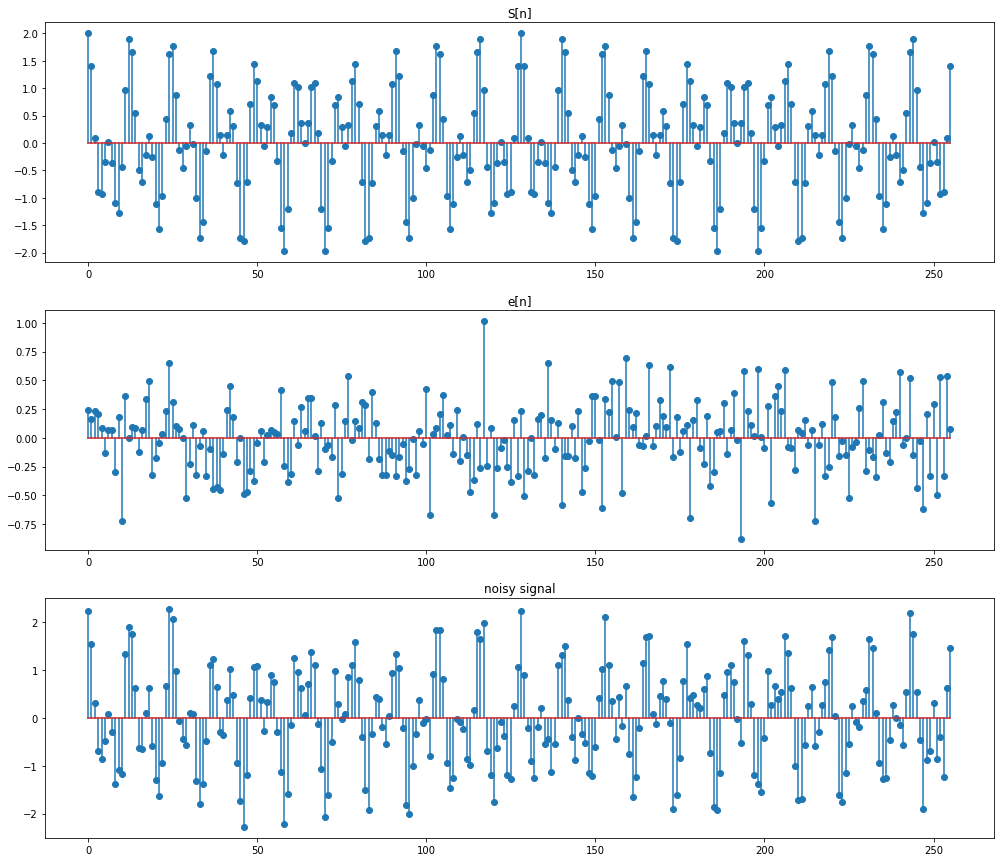

In [17]:
n = np.arange(256)
sn = np.cos(np.pi*5*n/32) + np.cos(np.pi*21*n/64)
en = 0.3*np.random.randn(256)

xn = sn + en

plt.figure(figsize = (17, 15))
plt.subplot(311)
plt.stem(sn)
plt.title('S[n]')

plt.subplot(312)
plt.stem(en)
plt.title('e[n]')

plt.subplot(313)
plt.stem(xn)
plt.title('noisy signal')
plt.show()


In [18]:
energy = np.sum(np.abs((sn - xn))**2)
print("Energy of error signal is: ",energy, "dB")

Energy of error signal is:  24.219778098259166 dB


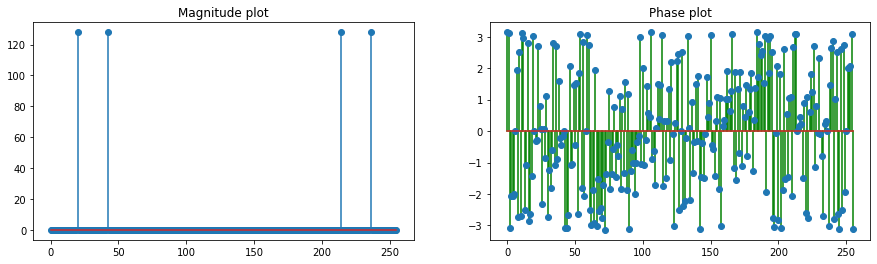

In [19]:
SN = DFT_plot(sn, n=256, ret = True)

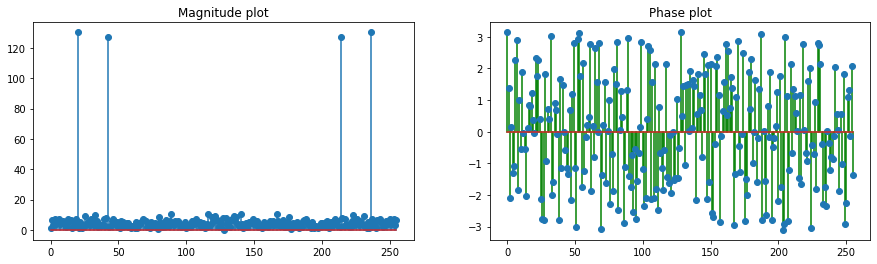

In [20]:
XN = DFT_plot(xn, n=256, ret = True)

In [21]:
#print(XN)
X_cap = np.zeros(256)
for i in range(256):
    if SN[i]!=0:
        X_cap[i]=XN[i]
X_cap.shape

(256,)

In [22]:

x_cap = np.fft.ifft(X_cap)
x_cap.shape


(256,)

<StemContainer object of 3 artists>

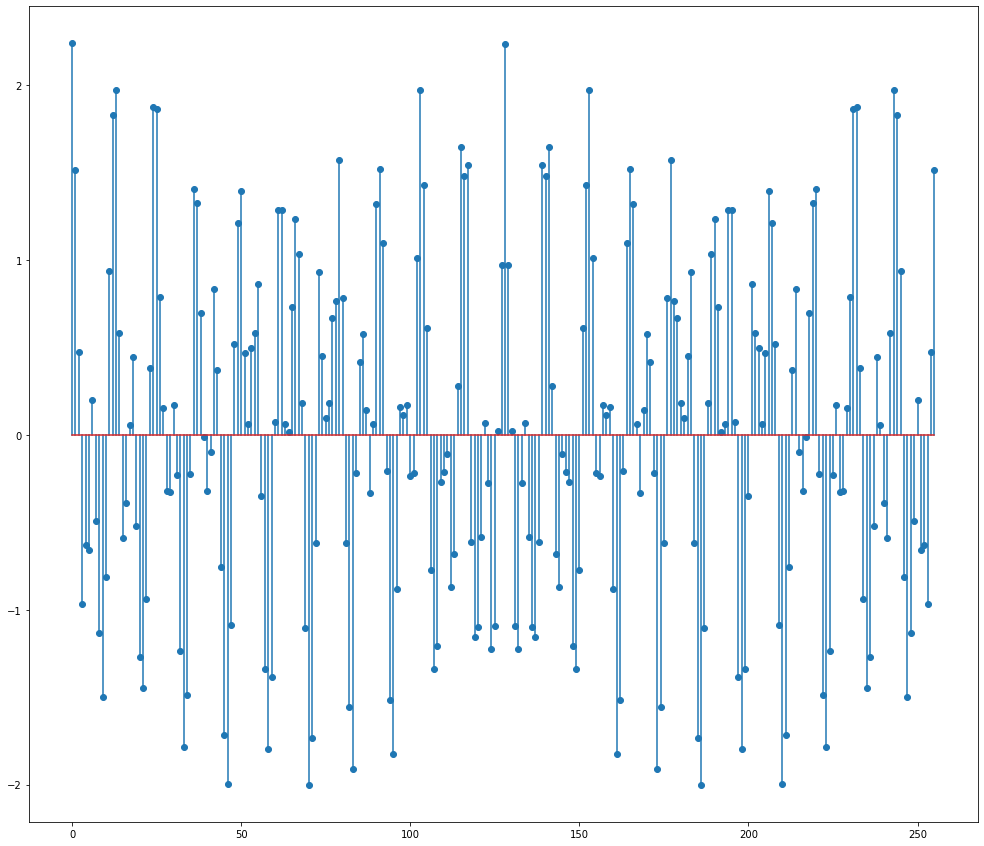

In [25]:
plt.figure(figsize = (17, 15))
plt.stem(x_cap)

In [26]:
energy = np.sum(np.abs((sn - x_cap))**2)
print("Energy of error signal is: ",energy)

Energy of error signal is:  11.68060911903347


**observation- Energy of error in recovered signal is almost half as per energy of error signal in original noisy signal.**

Q5. Generate the following signals $x_1[n] = cos({\pi}n/15),~~x_2[n] = cos(3{\pi}n/15)$ for n = 0 to 31. Plot the magnitude of 64 point DFT of the two signals $X_1[k]$ and $X_2[k]$ (with zero padding). Now concatenate the two signals to form a 64 length sequence $x[n]$. Plot the 64 point DFT magnitude $X[k]$ of $x[n]$. Also find the sum of two signals and plot the 64 point DFT of the result. (DFT do not give any temporal information and both results look similar)

In [27]:
n = np.arange(32)
x51 = np.cos(np.pi*n/15)
x52 = np.cos(np.pi*3*n/15)

x_51_64 = np.concatenate((x51,np.zeros(32)))
x_52_64 = np.concatenate((x52,np.zeros(32)))
x_concat = np.concatenate((x51,x52))
x_addn = np.concatenate((x51+x52 , np.zeros(32)))

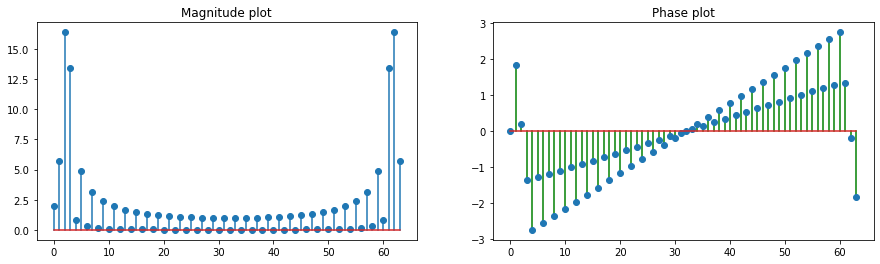

In [28]:
DFT_plot(x_51_64, n=64)

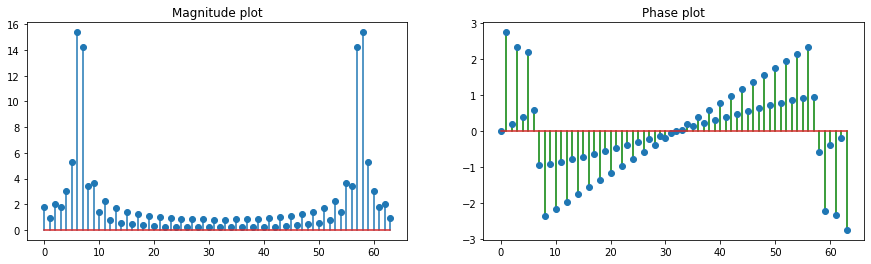

In [29]:
DFT_plot(x_52_64, n=64)

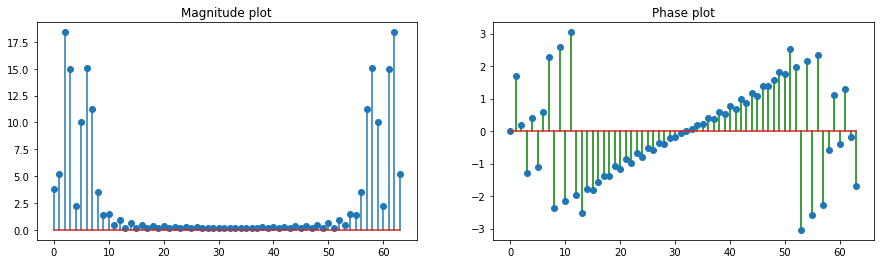

In [30]:
DFT_plot(x_concat, n=64)

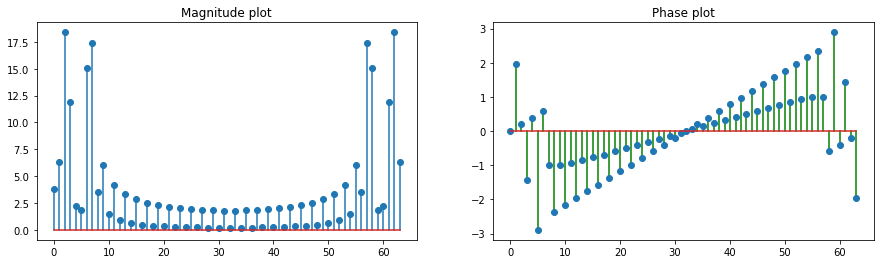

In [10]:
DFT_plot(x_addn, n=64)